# 📈 Prédire la valeur de l’action Google dans le futur

**Contexte :** <blockquote> Vous êtes datascientist chez Google en charge d'un nouveau projet autour de TimeSeries. Votre premier projet consiste à proposer une solution permettant de prédire la tendance de l'action Google dans le futur et de former une nouvelle équipe de datascientists (juniors) sur les RNN et en particulier les LSTM.

    
Pour réaliser ce projet, vous avez accés à deux datasets :
* Dataset Train : 5 années d’historique de l’action google 2012 - 2016
* Dataset Test : un mois de données Janvier 2017

Développer une solution basée sur les réseaux de neurones récurrents de type LSTM et permettant de prédire l'action Google dans le futur</blockquote> 

# 👩🏻‍💻 Exploration des données

## Imports

🔎 Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Fonctions

In [2]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

🔎 Import Dataset

In [38]:
df = pd.read_csv('Google_Stock_Price_Train.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#df = pd.read_csv?
#df

## Informations des données

In [5]:
df.shape

(1258, 5)

🔎 Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


🔎 Data Descriptive

In [7]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


🔎 Types de données

In [8]:
df.dtypes.value_counts()

float64    3
object     2
dtype: int64

In [9]:
df.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

🔎 Valeurs manquantes

In [10]:
df.isnull().sum().sort_values()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

🔎 Duplicates

In [11]:
df.duplicated().sum()

0

# 🎨 Visualisations

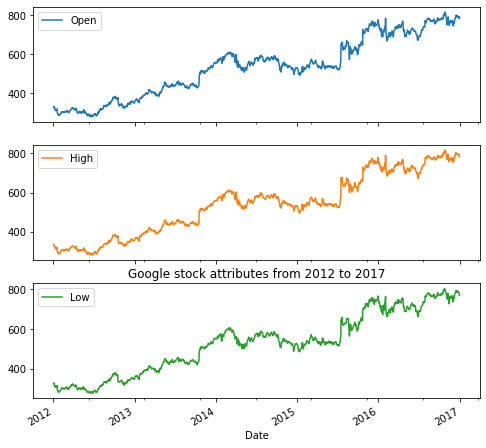

In [12]:
df.plot(subplots=True, figsize=(8,8))
plt.title('Google stock attributes from 2012 to 2017')
plt.show()

# 🌌Preprocessing

## Import librairies

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

## Standardisation et Echantillonnage

In [14]:
training_set = df.iloc[:,1:2].values

In [39]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [40]:
X_train=[]
y_train=[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 🔢 Modèles

In [43]:
regressor = Sequential()

In [44]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [45]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [46]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [48]:
regressor.add(Dense(units = 1))

In [49]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 9s 94ms/step - loss: 0.0460: 1s - 
Epoch 2/50
38/38 [==============================] - 3s 85ms/step - loss: 0.0060
Epoch 3/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0051
Epoch 4/50
38/38 [==============================] - 3s 80ms/step - loss: 0.0048
Epoch 5/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0046
Epoch 6/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0041
Epoch 7/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0043
Epoch 8/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0037
Epoch 9/50
38/38 [==============================] - 3s 82ms/step - loss: 0.0040
Epoch 10/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0040
Epoch 11/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0038
Epoch 12/50
38/38 [==============================] - 3s 80ms/step - loss: 0.0037
Epoch 13/50
38/38 [===========

# Modèle test

In [51]:
test = pd.read_csv('Google_Stock_Price_Test.csv', index_col='Date', parse_dates=['Date'])
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([df['Open'],test['Open']],axis=0)

In [52]:
inputs = total_data[len(df)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [53]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [54]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [55]:
predicted_stock_price

array([[767.41394],
       [766.0164 ],
       [764.2468 ],
       [762.92456],
       [762.047  ],
       [762.19867],
       [763.65   ],
       [766.3143 ],
       [770.1608 ],
       [774.79596],
       [779.59296],
       [784.19635],
       [787.68616],
       [790.284  ],
       [792.05835],
       [792.968  ],
       [793.1213 ],
       [792.74457],
       [792.24744],
       [791.23694]], dtype=float32)

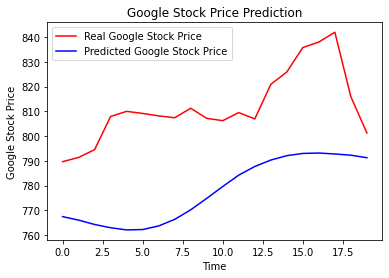

In [56]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()